In [3]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../news/scraping_result/kr/2020_up1/2020_up1_(KR)Hankyung.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../news/scraping_result/kr/2020_up1/2020_up1_(KR)Tokenpost.csv', error_bad_lines=False))
data = data.append(pd.read_csv('../../news/scraping_result/kr/2020_up1/2020_up1_(KR)BlockMedia.csv', error_bad_lines=False))


In [4]:
data.loc[data['main article']=="Provided by Coinness",'main article'] = data.loc[data['main article']=="Provided by Coinness",'abstract']
data.loc[data['main article']=="Provided by 코인니스",'main article'] = data.loc[data['main article']=="Provided by 코인니스",'abstract']
# data.loc[data['main article']=='Provided by 코인니스','abstract']

In [5]:
text = data[['main article']].astype(str)

text.loc[text['main article']=="Provided by Coinness"]



,main article


In [6]:
text['main article'] = text.apply(lambda row: row['main article'].replace("/"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("-"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("—"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\xa0",""), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("*"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("…"," "), axis=1)
text['main article'] = text.apply(lambda row: row['main article'].replace("\\"," "), axis=1)

In [7]:
from konlpy.tag import Mecab
mecab = Mecab()
text['main token article'] = text.apply(lambda row: mecab.morphs(row['main article']), axis=1)

In [8]:
text['main article']

0      \n\n\n\n\n사진=PIXABAY\n\n                      ...
1      \n\n\n\n\n사진=PIXABAY\n\n                      ...
2      \n\n\n\n\n\n\n                        비트코인 가격이...
3      \n\t\t\t\t\t\t\t\t가상화폐거래소가 줄줄이 문을 닫고 있다. 지난해 폐...
4      \n\n\n\n\n사진=저스틴 선 트론 창업자 트위터 화면 갈무리\n\n      ...
                             ...                        
113    ‘더 헌터스’는 걸으며 암호화폐를 찾는 블록체인 게이밍 앱이다. 플레이어는 현실 지...
114    젠서는 한국 테헤란로와 상암,을지로에 위치한 대형 건물68개를 관리하고 있으며,최근...
115    과기부와 KISA, 정보통신산업진흥원, 정보통신기획평가원은 17일 서울 IT벤처타워...
116    과학기술정보통신부는 오는 10일 대한상공회의소 의원회의실에서 국내 벤처․중소․중견 ...
117    BBC에 따르면 보다폰은 성명을 통해 “보다폰 그룹이 리브라 협회를 탈퇴하기로 결정...
Name: main article, Length: 232, dtype: object

In [9]:
# 소문자 적용 , - 문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word.replace("-","") for word in x])
# 공백문자 삭제
text['main token article'] = text['main token article'].apply(lambda x : [word for word in x if word])

In [10]:
text['pos tag'] = text.apply(lambda row: mecab.pos(row['main article']), axis=1)

In [11]:
text['pos tag']

0      [(사진, NNG), (=, SY), (PIXABAY, SL), (비트코인, NNP...
1      [(사진, NNG), (=, SY), (PIXABAY, SL), (가, JKS), ...
2      [(비트코인, NNP), (가격, NNG), (이, JKS), (급등, NNG), ...
3      [(가상, NNG), (화폐, NNG), (거래소, NNG), (가, JKS), (...
4      [(사진, NNG), (=, SY), (저스틴, NNP), (선, NNG), (트론...
                             ...                        
113    [(‘, SY), (더, MAG), (헌터스, NNP), (’, SY), (는, J...
114    [(젠서, NNP), (는, JX), (한국, NNP), (테헤란로, NNP), (...
115    [(과기부, NNG), (와, JC), (KISA, SL), (,, SC), (정보...
116    [(과학, NNG), (기술, NNG), (정보, NNG), (통신부, NNG), ...
117    [(BBC, SL), (에, JKB), (따르, VV), (면, EC), (보다폰,...
Name: pos tag, Length: 232, dtype: object

In [12]:
# 불용어 품사 제거
text['main article'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('JKS','JX','JKO','JKB','EC','EP','SN','EP+EC')])

In [13]:
text['main article']

0      [사진, =, PIXABAY, 비트코인, 의, 해외, 시세, 만, 원, 돌파, 하,...
1      [사진, =, PIXABAY, 상, 화폐, (, 암호, 화폐, ), 대, 장주, 비...
2      [비트코인, 가격, 급등, 하, 있, 다, ., 이란, 일, 오전, 미군, 주둔, ...
3      [가상, 화폐, 거래소, 줄줄이, 문, 닫, 있, 다, ., 지난해, 폐업, 한, ...
4      [사진, =, 저스틴, 선, 트론, 창업자, 트위터, 화면, 갈무리, ‘, 가치, ...
                             ...                        
113    [‘, 더, 헌터스, ’, 걸으며, 암호, 화폐, 찾, 는, 블록체인, 게이밍, 앱...
114    [젠서, 한국, 테헤란로, 와, 상암, ,, 을지로, 위치, 한, 대형, 건물, 개...
115    [과기부, 와, KISA, ,, 정보, 통신, 산업, 진, 흥원, ,, 정보, 통신...
116    [과학, 기술, 정보, 통신부, 오, 는, 일, 대한, 상공, 회의소, 의원, 회의...
117    [BBC, 따르, 보다폰, 성명, 통해, “, 보다폰, 그룹, 리브, 라, 협회, ...
Name: main article, Length: 232, dtype: object

In [14]:
import csv
stopword_list =[]
f = open('../../stopword/stop_ko.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['main article'] = text['main article'].apply(lambda x: [word for word in x if word not in stopword_list])

In [15]:
tokenized_doc = text['main article'].apply(lambda x: [word for word in x if len(word) > 1])
print(tokenized_doc)
#tokenized_doc = text['main article']
#tokenized_doc

0      [사진, PIXABAY, 비트코인, 해외, 시세, 돌파, 상승세, 보이, 그러나, ...
1      [사진, PIXABAY, 화폐, 암호, 화폐, 장주, 비트코인, 시세, 돌파, 지난...
2      [비트코인, 가격, 급등, 이란, 오전, 미군, 주둔, 이라크, 아인, 아사드, 공...
3      [가상, 화폐, 거래소, 줄줄이, 지난해, 폐업, 거래소, 달한다, 국내, 비트코인...
4      [사진, 저스틴, 트론, 창업자, 트위터, 화면, 갈무리, 가치, 투자, 귀재, 워...
                             ...                        
113    [헌터스, 걸으며, 암호, 화폐, 블록체인, 게이밍, 플레이어, 현실, 지도, 골드...
114    [젠서, 한국, 테헤란로, 상암, 을지로, 위치, 대형, 건물, 관리, 최근, 글로...
115    [과기부, KISA, 정보, 통신, 산업, 흥원, 정보, 통신, 기획, 평가, 서울...
116    [과학, 기술, 정보, 통신부, 상공, 회의소, 의원, 회의실, 국내, 벤처, 중소...
117    [BBC, 보다폰, 성명, 통해, 보다폰, 그룹, 리브, 협회, 탈퇴, 결정, 했으...
Name: main article, Length: 232, dtype: object


In [16]:
article_contents = tokenized_doc.values.tolist()

In [17]:
len(tokenized_doc)

232

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [19]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [20]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [21]:
# article_contents_tfidf

In [22]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [23]:
word2id = defaultdict(lambda: 0)

In [24]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [25]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [26]:
len(tf_idf_result)

4775

In [27]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

4775


In [28]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [29]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.001*"OBFT" + 0.001*"실수" + 0.001*"BM" + 0.001*"Byzantine" + 0.001*"공인" + 0.001*"받아들였" + 0.001*"아프리카" + 0.001*"스탁스"')
(1, '0.001*"나왔" + 0.001*"쇼핑객" + 0.001*"라이센스" + 0.001*"지나" + 0.001*"레벨" + 0.001*"화장품" + 0.001*"명시" + 0.001*"후임"')
(2, '0.000*"분야" + 0.000*"처할" + 0.000*"이뤄질" + 0.000*"싸움" + 0.000*"랭귀지" + 0.000*"그런" + 0.000*"coinness" + 0.000*"포스"')
(3, '0.001*"정부서울청사" + 0.001*"FPGA" + 0.001*"장치" + 0.001*"Concept" + 0.001*"ICT" + 0.001*"샌드박스" + 0.001*"일체" + 0.001*"과기"')


In [30]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [31]:
sentences = article_contents

In [32]:
length1 = 0
for setence in sentences :
    length1 += len(setence) 
length1

27717

In [33]:
from gensim.models import Word2Vec

In [34]:
model = Word2Vec(sentences, min_count=1)

In [35]:
len(model.wv.vocab)

4775

In [36]:
# model.wv.vocab

In [37]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [38]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/nltk/decorators.py:68: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  regargs, varargs, varkwargs, defaults, formatvalue=lambda value: ""
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/nltk/lm/counter.py:15: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence, defaultdict


In [39]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [40]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [41]:
temp_cluster_result['cluster'] = assigned_clusters

In [42]:
temp_cluster_result['raw_data'] = X.tolist()

In [43]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [44]:
from sklearn.metrics import pairwise_distances

In [45]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [46]:
len(cosine_centroid_list)

4775

In [47]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [48]:
sum(temp_distance[3])

84.01035312687546

In [49]:
import scipy.spatial.distance as dist

In [50]:
dist.cosine(X[0],cosine_centroid_list[0])

0.027478472931095177

In [51]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.04764912887903793

In [52]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [53]:
len(tf_idf_value)

4775

In [54]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [55]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2,"[0.12349174171686172, -0.4359639585018158, -0....",비트코인,0,"[0.0063652447, -0.02178358, -0.03338865, 0.017...",0.000063,0.465910,0.534153,NaN
20,"[0.09032036364078522, -0.33501869440078735, -0...",화폐,0,"[0.0063652447, -0.02178358, -0.03338865, 0.017...",0.000178,0.334963,0.665214,NaN
19,"[0.08397125452756882, -0.2763110101222992, -0....",암호,0,"[0.0063652447, -0.02178358, -0.03338865, 0.017...",0.000211,0.284321,0.715890,NaN
25,"[0.09009195119142532, -0.29176926612854004, -0...",달러,0,"[0.0063652447, -0.02178358, -0.03338865, 0.017...",0.000167,0.259723,0.740443,NaN
198,"[0.0942644253373146, -0.32139718532562256, -0....",코인,0,"[0.0063652447, -0.02178358, -0.03338865, 0.017...",0.000155,0.190271,0.809884,NaN
160,"[0.0854656845331192, -0.30046358704566956, -0....",블록체인,0,"[0.0063652447, -0.02178358, -0.03338865, 0.017...",0.000146,0.188100,0.812046,NaN
10,"[0.07559527456760406, -0.2677958309650421, -0....",시장,0,"[0.0063652447, -0.02178358, -0.03338865, 0.017...",0.000156,0.144693,0.855463,NaN
21,"[0.08064881712198257, -0.2867172062397003, -0....",거래소,0,"[0.0063652447, -0.02178358, -0.03338865, 0.017...",0.000129,0.140352,0.859778,NaN
34,"[0.07760327309370041, -0.2738989591598511, -0....",거래,0,"[0.0063652447, -0.02178358, -0.03338865, 0.017...",0.000134,0.128053,0.872081,NaN
480,"[0.06896756589412689, -0.2431454211473465, -0....",서비스,0,"[0.0063652447, -0.02178358, -0.03338865, 0.017...",0.000182,0.121542,0.878640,NaN


In [56]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2112,"[0.0005751704447902739, -0.009412424638867378,...",진행할,1,"[0.00085585704, -0.0032314425, -0.004954287, 0...",0.085767,0.001447,1.084321,NaN
1611,"[-0.002457244787365198, -0.004155877977609634,...",와이스,1,"[0.00085585704, -0.0032314425, -0.004954287, 0...",0.087773,0.002170,1.085602,NaN
4207,"[0.006307368632405996, -0.0077367061749100685,...",인지,1,"[0.00085585704, -0.0032314425, -0.004954287, 0...",0.090001,0.002170,1.087830,NaN
4297,"[0.003154320176690817, -0.010304891504347324, ...",사물,1,"[0.00085585704, -0.0032314425, -0.004954287, 0...",0.092854,0.002170,1.090684,NaN
2904,"[0.0008961586863733828, -0.009502784349024296,...",장악,1,"[0.00085585704, -0.0032314425, -0.004954287, 0...",0.094137,0.002170,1.091967,NaN
2037,"[0.0032038711942732334, -0.01204288937151432, ...",자리매김,1,"[0.00085585704, -0.0032314425, -0.004954287, 0...",0.096576,0.002170,1.094406,NaN
2817,"[0.003614947898313403, -0.00699283042922616, -...",포럼,1,"[0.00085585704, -0.0032314425, -0.004954287, 0...",0.112703,0.001447,1.111256,NaN
1219,"[0.0018287085695192218, -0.004267193377017975,...",바로,1,"[0.00085585704, -0.0032314425, -0.004954287, 0...",0.113037,0.001447,1.111590,NaN
2569,"[0.007012045010924339, -0.00897765252739191, -...",종류,1,"[0.00085585704, -0.0032314425, -0.004954287, 0...",0.117022,0.001447,1.115575,NaN
543,"[0.0046767122112214565, -0.00489989435300231, ...",PG,1,"[0.00085585704, -0.0032314425, -0.004954287, 0...",0.125821,0.000723,1.125098,NaN


In [57]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 인플루언서

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2735,"[0.00706500606611371, -0.013470405712723732, -...",시킨,2,"[0.001577732, -0.003549655, -0.005808581, 0.00...",0.084184,0.002894,1.081290,NaN
691,"[0.0023936431389302015, -0.012561572715640068,...",재편,2,"[0.001577732, -0.003549655, -0.005808581, 0.00...",0.099157,0.001447,1.097710,NaN
3312,"[0.0007991024758666754, -0.006412991788238287,...",측정,2,"[0.001577732, -0.003549655, -0.005808581, 0.00...",0.100982,0.001447,1.099535,NaN
2072,"[-0.001763917156495154, -0.004502408672124147,...",장관,2,"[0.001577732, -0.003549655, -0.005808581, 0.00...",0.104877,0.001447,1.103430,NaN
2855,"[0.003267795080319047, -0.01174627710133791, -...",명시,2,"[0.001577732, -0.003549655, -0.005808581, 0.00...",0.107604,0.002170,1.105433,NaN
1212,"[-0.0003132970305159688, -0.004835563711822033...",알렉스,2,"[0.001577732, -0.003549655, -0.005808581, 0.00...",0.113478,0.002170,1.111307,NaN
4551,"[0.004669432528316975, -0.010630063712596893, ...",부사장,2,"[0.001577732, -0.003549655, -0.005808581, 0.00...",0.116896,0.001447,1.115449,NaN
2586,"[-0.002097837161272764, -0.009604159742593765,...",해커,2,"[0.001577732, -0.003549655, -0.005808581, 0.00...",0.117942,0.002170,1.115772,NaN
1744,"[-0.0003757979138754308, -0.011803696863353252...",Mode,2,"[0.001577732, -0.003549655, -0.005808581, 0.00...",0.117390,0.000723,1.116666,NaN
865,"[0.004445870406925678, -0.0036403206177055836,...",불안감,2,"[0.001577732, -0.003549655, -0.005808581, 0.00...",0.121622,0.001447,1.120175,NaN


In [58]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
12,"[-0.0009310522000305355, -0.008141306228935719...",프리미엄,3,"[0.00025253388, -0.002566, -0.0039827162, 0.00...",0.105401,0.002170,1.103231,NaN
2756,"[-0.0027356729842722416, -0.003386508207768202...",재판소,3,"[0.00025253388, -0.002566, -0.0039827162, 0.00...",0.107433,0.001447,1.105986,NaN
3223,"[0.001144160982221365, -0.009200064465403557, ...",조심,3,"[0.00025253388, -0.002566, -0.0039827162, 0.00...",0.108751,0.002170,1.106581,NaN
2130,"[-0.0014516303781419992, -0.008554368279874325...",구하,3,"[0.00025253388, -0.002566, -0.0039827162, 0.00...",0.108184,0.001447,1.106737,NaN
1139,"[0.0036075080279260874, -0.001956474268808961,...",가해,3,"[0.00025253388, -0.002566, -0.0039827162, 0.00...",0.118701,0.001447,1.117254,NaN
3530,"[-0.00010129073780262843, -0.00243475567549467...",가시,3,"[0.00025253388, -0.002566, -0.0039827162, 0.00...",0.136164,0.002170,1.133993,NaN
2761,"[4.111161979380995e-05, -0.0033563897013664246...",대책,3,"[0.00025253388, -0.002566, -0.0039827162, 0.00...",0.137448,0.001447,1.136001,NaN
940,"[-0.0013420827453956008, -0.004989250097423792...",transactability,3,"[0.00025253388, -0.002566, -0.0039827162, 0.00...",0.139483,0.001447,1.138036,NaN
976,"[0.0017011637100949883, -0.0058385408483445644...",오를,3,"[0.00025253388, -0.002566, -0.0039827162, 0.00...",0.144486,0.001447,1.143039,NaN
4504,"[0.00017425819532945752, -0.005823750980198383...",전이,3,"[0.00025253388, -0.002566, -0.0039827162, 0.00...",0.144530,0.001447,1.143083,NaN


In [59]:
y_km = temp_cluster_result['cluster'].values

In [60]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

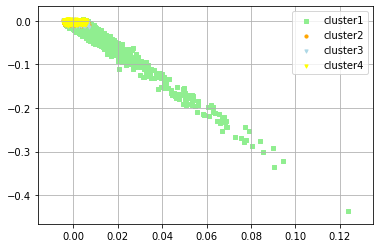

In [61]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 거래소

3116

In [63]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 비즈

548

In [64]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 인플루언서

570

In [65]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 기타

541

In [66]:
temp_cluster_result['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [67]:
temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [68]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 12 # 거래소

In [69]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 7 #  비즈

In [70]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 6 #  인플루언서

In [71]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 13 # 기타 

In [72]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [73]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [74]:
kmeans.inertia_

26.025779170351992

In [75]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 1 2 ... 1 1 1]


In [76]:
cluster_values= list(model.wv.vocab)

In [77]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-26.02578


In [78]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [79]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.6969348


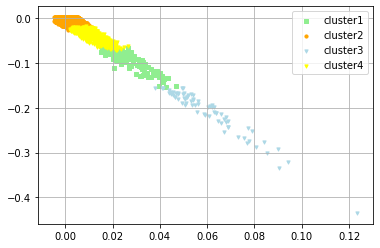

In [80]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [81]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [82]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [83]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [84]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [85]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [86]:
import scipy.spatial.distance as dist

In [87]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [88]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [89]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
306,"[0.0245115514844656, -0.09189178794622421, -0....",활용,0,"[0.027278058, -0.09543848, -0.14764929, 0.0765...",0.029653,0.026768,1.002885,NaN
1308,"[0.02869992144405842, -0.09909629821777344, -0...",솔루션,0,"[0.027278058, -0.09543848, -0.14764929, 0.0765...",0.028613,0.023151,1.005463,NaN
2082,"[0.025098271667957306, -0.09402250498533249, -...",프로젝트,0,"[0.027278058, -0.09543848, -0.14764929, 0.0765...",0.032605,0.024598,1.008007,NaN
461,"[0.030594352632761, -0.09132387489080429, -0.1...",공개,0,"[0.027278058, -0.09543848, -0.14764929, 0.0765...",0.031105,0.020980,1.010124,NaN
1758,"[0.03252626582980156, -0.09361656755208969, -0...",필요,0,"[0.027278058, -0.09543848, -0.14764929, 0.0765...",0.033444,0.022427,1.011017,NaN
840,"[0.02425486594438553, -0.09222225844860077, -0...",경제,0,"[0.027278058, -0.09543848, -0.14764929, 0.0765...",0.032076,0.020980,1.011095,NaN
283,"[0.025181803852319717, -0.0985046848654747, -0...",가치,0,"[0.027278058, -0.09543848, -0.14764929, 0.0765...",0.036866,0.025321,1.011545,NaN
680,"[0.023725073784589767, -0.10116597265005112, -...",시가총액,0,"[0.027278058, -0.09543848, -0.14764929, 0.0765...",0.034040,0.021704,1.012336,NaN
985,"[0.024415628984570503, -0.09480433166027069, -...",마켓,0,"[0.027278058, -0.09543848, -0.14764929, 0.0765...",0.052192,0.039790,1.012402,NaN
320,"[0.02520100027322769, -0.08976370096206665, -0...",동안,0,"[0.027278058, -0.09543848, -0.14764929, 0.0765...",0.036874,0.023874,1.013000,NaN


In [90]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(20,'score') # 인플루언서

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
607,"[0.0019335804972797632, -0.011420956812798977,...",용의자,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.025092,0.001447,1.023645,NaN
2720,"[-0.0005463752313517034, -0.004315799102187157...",다수,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.025919,0.002170,1.023749,NaN
3838,"[0.002611311385408044, -0.0017148421611636877,...",무기,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.027027,0.002894,1.024133,NaN
3704,"[0.003865172155201435, -0.00852324441075325, -...",안철수,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.025591,0.001447,1.024144,NaN
2830,"[0.0010735758114606142, -0.006791406776756048,...",감기,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.026319,0.002170,1.024149,NaN
2509,"[0.0001330361992586404, -0.008783604949712753,...",데일리,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.026522,0.002170,1.024351,NaN
3402,"[-0.00048706651432439685, -0.01117978245019912...",현명,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.025945,0.001447,1.024498,NaN
1065,"[-0.0017957920208573341, -0.007181029766798019...",주의,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.025973,0.001447,1.024526,NaN
1829,"[-0.0016785680782049894, -0.004386682063341141...",토대,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.026776,0.002170,1.024605,NaN
3068,"[-0.0008592036901973188, -0.006309289019554853...",벌이,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.026078,0.001447,1.024631,NaN


In [91]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
47,"[0.06797098368406296, -0.2198714017868042, -0....",시간,2,"[0.060272906, -0.20963763, -0.32199404, 0.1683...",0.060002,0.120818,0.939183,NaN
24,"[0.06290984898805618, -0.20950303971767426, -0...",현재,2,"[0.060272906, -0.20963763, -0.32199404, 0.1683...",0.030135,0.070176,0.959959,NaN
43,"[0.055534426122903824, -0.2083144187927246, -0...",상승,2,"[0.060272906, -0.20963763, -0.32199404, 0.1683...",0.044734,0.083922,0.960812,NaN
116,"[0.06580223143100739, -0.21352633833885193, -0...",투자,2,"[0.060272906, -0.20963763, -0.32199404, 0.1683...",0.036711,0.058601,0.978110,NaN
104,"[0.06377477198839188, -0.211220383644104, -0.3...",관련,2,"[0.060272906, -0.20963763, -0.32199404, 0.1683...",0.042656,0.062941,0.979715,NaN
496,"[0.06377953290939331, -0.2119409292936325, -0....",지원,2,"[0.060272906, -0.20963763, -0.32199404, 0.1683...",0.032953,0.052089,0.980863,NaN
120,"[0.05848800390958786, -0.21441569924354553, -0...",다는,2,"[0.060272906, -0.20963763, -0.32199404, 0.1683...",0.059671,0.070176,0.989495,NaN
78,"[0.061941035091876984, -0.1987762451171875, -0...",출시,2,"[0.060272906, -0.20963763, -0.32199404, 0.1683...",0.073495,0.082475,0.991020,NaN
142,"[0.06098636984825134, -0.19696348905563354, -0...",지난해,2,"[0.060272906, -0.20963763, -0.32199404, 0.1683...",0.074034,0.070176,1.003858,NaN
56,"[0.05891498923301697, -0.21622563898563385, -0...",밝혔,2,"[0.060272906, -0.20963763, -0.32199404, 0.1683...",0.070751,0.065112,1.005639,NaN


In [92]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1234,"[0.012927623465657234, -0.03962686285376549, -...",모든,3,"[0.011495558, -0.038778894, -0.059339672, 0.03...",0.028689,0.010852,1.017837,NaN
203,"[0.014403015375137329, -0.0369633324444294, -0...",전체,3,"[0.011495558, -0.038778894, -0.059339672, 0.03...",0.028889,0.010852,1.018037,NaN
757,"[0.007365049794316292, -0.04224037751555443, -...",본격,3,"[0.011495558, -0.038778894, -0.059339672, 0.03...",0.028975,0.010852,1.018123,NaN
704,"[0.009381559677422047, -0.03861420974135399, -...",오른,3,"[0.011495558, -0.038778894, -0.059339672, 0.03...",0.032681,0.014469,1.018212,NaN
2471,"[0.013914821669459343, -0.03427871689200401, -...",나타내,3,"[0.011495558, -0.038778894, -0.059339672, 0.03...",0.026317,0.007958,1.018359,NaN
3577,"[0.016374874860048294, -0.0353536494076252, -0...",부산시,3,"[0.011495558, -0.038778894, -0.059339672, 0.03...",0.027840,0.009405,1.018435,NaN
2454,"[0.01053047925233841, -0.03493538871407509, -0...",간편,3,"[0.011495558, -0.038778894, -0.059339672, 0.03...",0.029500,0.010852,1.018648,NaN
881,"[0.011686927638947964, -0.04169188812375069, -...",환율,3,"[0.011495558, -0.038778894, -0.059339672, 0.03...",0.028895,0.010128,1.018766,NaN
882,"[0.013691010884940624, -0.037832073867321014, ...",송금,3,"[0.011495558, -0.038778894, -0.059339672, 0.03...",0.029850,0.010852,1.018998,NaN
4475,"[0.010517205111682415, -0.03984714671969414, -...",바우처,3,"[0.011495558, -0.038778894, -0.059339672, 0.03...",0.030018,0.010852,1.019166,NaN


In [93]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #비즈

130

In [94]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #인플

4043

In [95]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #투자

71

In [96]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #긍정

531

In [97]:
temp_cluster_result1['category'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [98]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 7 # 비즈 

In [99]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 6 # 인플

In [100]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 11 # 투자 

In [101]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 1 # 긍정  

In [102]:
temp_cluster_result1

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#,category,label
0,"[0.008278771303594112, -0.019323358312249184, ...",사진,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.081235,0.005788,1.075447,NaN,2,6.0
1,"[-0.0017453839536756277, -0.005309186410158873...",PIXABAY,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.038958,0.000723,1.038235,NaN,2,6.0
2,"[0.12349174171686172, -0.4359639585018158, -0....",비트코인,2,"[0.060272906, -0.20963763, -0.32199404, 0.1683...",1.688564,0.465910,2.222654,NaN,2,11.0
3,"[0.006030668970197439, -0.02718167193233967, -...",해외,3,"[0.011495558, -0.038778894, -0.059339672, 0.03...",0.076195,0.009405,1.066790,NaN,2,1.0
4,"[0.014498122036457062, -0.04683591052889824, -...",시세,3,"[0.011495558, -0.038778894, -0.059339672, 0.03...",0.077165,0.014469,1.062695,NaN,2,1.0
...,...,...,...,...,...,...,...,...,...,...
4770,"[0.001100994530133903, -0.0077220662496984005,...",담당자,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.030424,0.000723,1.029701,NaN,2,6.0
4771,"[0.0029972277116030455, -0.00918763130903244, ...",지남,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.029789,0.000723,1.029066,NaN,2,6.0
4772,"[0.0034747831523418427, 0.0009099332382902503,...",바뀔,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.034746,0.000723,1.034022,NaN,2,6.0
4773,"[0.005796318873763084, -0.007450840435922146, ...",탄력,1,"[0.0018326398, -0.00622731, -0.009560807, 0.00...",0.038198,0.000723,1.037475,NaN,2,6.0


In [103]:
temp_cluster_result1['Silhouette'] = 0.6969348
temp_cluster_result['Silhouette'] = 0.6969348

In [104]:
#temp_cluster_result1.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_euclidean.csv")
#temp_cluster_result.to_csv("../cluster/ko_news/2018_down1/ko_news_2018_down1_cosine.csv")

In [105]:
len(temp_cluster_result1)

4775

In [106]:
len(temp_cluster_result)

4775

In [107]:
temp_cluster_result1['result'] = 1
temp_cluster_result['result'] = 1

In [108]:
temp_cluster_result1.to_csv("../cluster/ko_news/2020_up1/ko_news_2020_up1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/ko_news/2020_up1/ko_news_2020_up1_cosine.csv")